In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('dataframe/champions.csv')

# Crear la nueva columna "Victoria" en función de los resultados de los partidos 1 si ganaa el equipo local, 0 si hay empate y 2 si gana el equipo visitante
df['Victoria'] = df.apply(lambda row: 1 if row['VictoriaLocal'] == 1 else (3 if row['Empate'] == 1 else 2), axis=1)

# Visualizar las primeras filas del DataFrame para verificar los cambios
df.head()

,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Victoria
0,121,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422,1
1,122,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148,1
2,123,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168,2
3,124,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874,1
4,125,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387,3


In [103]:
df = df.drop(['Temporada', 'Ronda', 'Evento'], axis=1)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   idPartido             2494 non-null   int64  
 1   Local                 2494 non-null   int64  
 2   Visitante             2494 non-null   int64  
 3   GolesLocal            2494 non-null   int64  
 4   GolesVisitante        2494 non-null   int64  
 5   VictoriaLocal         2494 non-null   int64  
 6   Empate                2494 non-null   int64  
 7   VictoriaVisitante     2494 non-null   int64  
 8   %_Victorias_Local     2494 non-null   float64
 9   %_Empate              2494 non-null   float64
 10  %_Victoria_Visitante  2494 non-null   float64
 11  %_Equipo1_Ganado      2494 non-null   float64
 12  %_Equipo2_Ganado      2494 non-null   float64
 13  %_1_G_Temporada       2494 non-null   float64
 14  %_1_G_Temporada_L     2494 non-null   float64
 15  %_1_E_Temporada_L    

In [105]:
from sklearn.model_selection import train_test_split

partido_features = df.drop(['Victoria', 'GolesLocal', 'GolesVisitante', 'VictoriaLocal', 'VictoriaVisitante', 'Empate'], axis=1).columns
objetivo = 'Victoria'

# Separate features and labels
partidos_X = df[partido_features].values
partidos_y = df[objetivo].values


# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(partidos_X, partidos_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=partidos_y)

print ('Training Set: %d, Test Set: %d \n' % (x_train.shape[0], x_test.shape[0]))

Training Set: 1745, Test Set: 749 



In [106]:
from sklearn.linear_model import LogisticRegression

multi_model = LogisticRegression(solver='liblinear', max_iter=10000)
multi_model.fit(x_train, y_train)
print (multi_model)

LogisticRegression(max_iter=10000, solver='liblinear')


In [107]:
# Realizar predicciones en el conjunto de prueba
predictions = multi_model.predict(x_test)

# Imprimir las etiquetas predichas y las etiquetas reales para las primeras 15 muestras del conjunto de prueba
print('Etiquetas predichas:', predictions[:15])
print('Etiquetas reales:   ', y_test[:15])


Etiquetas predichas: [1 2 1 1 1 1 2 2 1 1 1 2 1 1 2]
Etiquetas reales:    [1 2 1 2 2 1 3 2 2 1 1 2 1 1 1]


Métricas de evaluación del modelo

In [108]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.65      0.89      0.75       356
           2       0.58      0.64      0.61       225
           3       0.18      0.01      0.02       168

    accuracy                           0.62       749
   macro avg       0.47      0.52      0.46       749
weighted avg       0.52      0.62      0.55       749



- Precision: Para la clase 0, la precisión es baja (0.21), lo que indica que de todas las predicciones positivas para la clase 0, solo el 21% fueron realmente correctas. Para la clase 1, la precisión es mucho mejor (0.64), lo que indica que el 64% de las predicciones positivas para la clase 1 fueron correctas. Para la clase 2, la precisión es moderada (0.57), lo que indica que el 57% de las predicciones positivas para la clase 2 fueron correctas.

- Recall (Recuperación): Para la clase 0, el recall es muy bajo (0.02), lo que indica que solo se identificaron correctamente el 2% de todas las instancias de la clase 0. Para la clase 1, el recall es alto (0.81), lo que indica que se identificaron correctamente el 81% de todas las instancias de la clase 1. Para la clase 2, el recall también es alto (0.71), lo que indica que se identificaron correctamente el 71% de todas las instancias de la clase 2.

- F1-score: La puntuación F1 es una medida que combina precisión y recuperación en un solo número. Para la clase 0, el F1-score es muy bajo (0.03), lo que indica un bajo equilibrio entre precisión y recuperación. Para las clases 1 y 2, los F1-scores son más altos (0.72 y 0.63 respectivamente), lo que indica un mejor equilibrio entre precisión y recuperación en estas clases.

- Accuracy (Precisión global): La precisión global del modelo en todas las clases es del 60%, lo que indica que el 60% de las predicciones fueron correctas en general.

En general, estos resultados muestran que el modelo tiene dificultades para clasificar correctamente la clase 0, ya que tiene un recall muy bajo y una precisión baja. Sin embargo, para las clases 1 y 2, el modelo tiene un mejor rendimiento en términos de precisión, recall y F1-score.

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))


Overall Accuracy: 0.6194926568758344
Overall Precision: 0.47080308592615494
Overall Recall: 0.5155995481838178


In [110]:
#Imprimimos la matriz de confusión
from sklearn.metrics import confusion_matrix

m = confusion_matrix(y_test, predictions)
print(m)

[[317  35   4]
 [ 75 145   5]
 [ 97  69   2]]


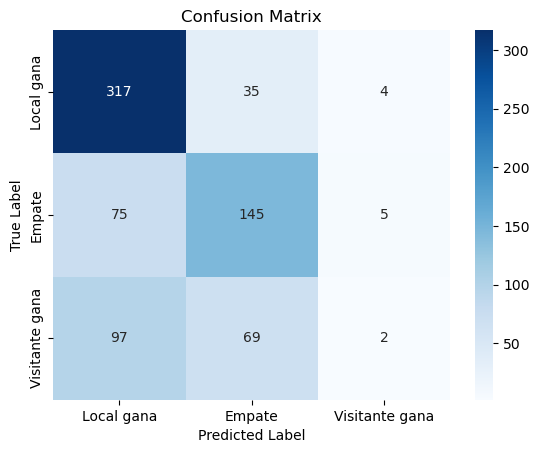

In [112]:

# Definir las clases de los partidos
partido_classes = ['Local gana', 'Empate', 'Visitante gana']

# Mostrar la matriz de confusión utilizando seaborn
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=partido_classes, yticklabels=partido_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()